### Liner Regression

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
x_train = [1, 2, 3]

In [3]:
y_train = [2+0.1, 4-0.2, 6+0.15]

Text(0, 0.5, 'Y')

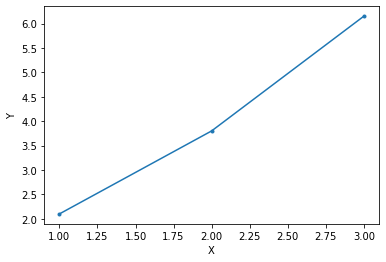

In [4]:
plt.plot(x_train, y_train,'.-')
plt.xlabel('X')
plt.ylabel('Y')

### Initialization (초기화)

In [5]:
# w, b 초기값 설정 - 자유롭게 변경해볼 것
w0 = 7;
b0 = -10;
W = tf.Variable(w0*tf.ones([1]), name='weight')
b = tf.Variable(b0*tf.ones([1]), name='bias')

### Hypothesis: xW + b

In [6]:
hypothesis = x_train * W + b

### Cost Function 정의

In [7]:
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

### Optimizer 설정

In [8]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01) # learning_rate 값을 바꿔가며 테스트 해볼 것
train = optimizer.minimize(cost)

### Launch the graph in a session

In [9]:
sess = tf.Session()

### Initilizes global variables in the graph

In [10]:
sess.run(tf.global_variables_initializer())

### Run!

In [11]:
# epoch: 반복횟수
nb_epoch = 2000

In [12]:
# w, b, cost 값의 변화를 저장할 변수 정의
vw = []
vb = []
vcost = []

In [13]:
for step in range(nb_epoch+1):
  sess.run(train)
  w1 = sess.run(W)[0] # slope
  b1 = sess.run(b)[0] # bias
  cost1 = sess.run(cost)
  vw.append(w1)
  vb.append(b1)
  vcost.append(cost1)
  if step % 100 == 0: # 100번마다 결과 출력해보기 (monitoring 목적)
    print(step, '--', cost1, '--', w1, '--', b1)

0 -- 16.112978 -- 6.9343333 -- -9.999666
100 -- 9.173922 -- 5.5383186 -- -8.019924
200 -- 5.6778927 -- 4.7867856 -- -6.311521
300 -- 3.517561 -- 4.1960154 -- -4.968562
400 -- 2.182608 -- 3.7316163 -- -3.9128737
500 -- 1.357687 -- 3.3665562 -- -3.0830057
600 -- 0.84793586 -- 3.0795853 -- -2.4306536
700 -- 0.5329406 -- 2.854 -- -1.9178456
800 -- 0.33829245 -- 2.6766696 -- -1.5147312
900 -- 0.21801193 -- 2.5372713 -- -1.197847
1000 -- 0.14368595 -- 2.4276922 -- -0.94874716
1100 -- 0.09775708 -- 2.341553 -- -0.75293213
1200 -- 0.06937576 -- 2.2738397 -- -0.5990038
1300 -- 0.05183783 -- 2.2206104 -- -0.4780021
1400 -- 0.041000407 -- 2.1787674 -- -0.3828831
1500 -- 0.034303572 -- 2.145875 -- -0.30811134
1600 -- 0.03016533 -- 2.120019 -- -0.24933368
1700 -- 0.027608156 -- 2.0996935 -- -0.20312952
1800 -- 0.026027998 -- 2.0837162 -- -0.16680856
1900 -- 0.025051534 -- 2.071156 -- -0.13825722
2000 -- 0.024448132 -- 2.0612826 -- -0.11581262


In [14]:
w1 = sess.run(W)[0] # slope
b1 = sess.run(b)[0] # bias
str1 = 'y={:.3}x + {:.3}'.format(w1, b1)
print(w1, b1)
print(str1)

2.0612826 -0.11581262
y=2.06x + -0.116


Text(0.5, 1.0, 'y=2.06x + -0.116')

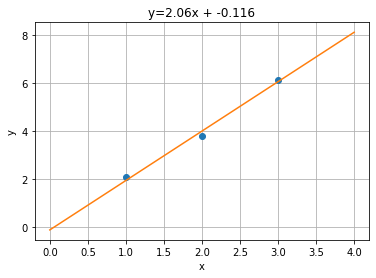

In [15]:
# regression 결과 그려보기
plt.figure(1)
plt.plot(x_train, y_train,'o')
x1 = np.min(x_train)-1, np.max(x_train)+1
y1 = np.dot(w1,x1) + b1
plt.plot(x1, y1)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title(str1)

Text(0, 0.5, 'b')

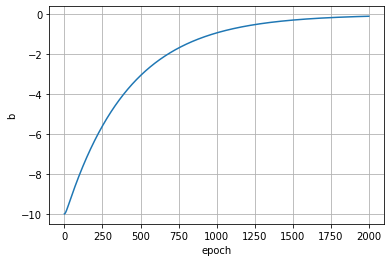

In [16]:
# 학습하는 동안 b의 변화 보기
plt.plot(vb)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('b')

Text(0, 0.5, 'w')

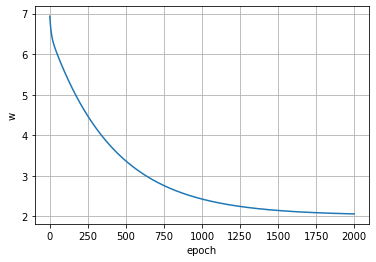

In [17]:
# 학습하는 동안 w의 변화 보기
plt.plot(vw)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('w')

Text(0, 0.5, 'cost')

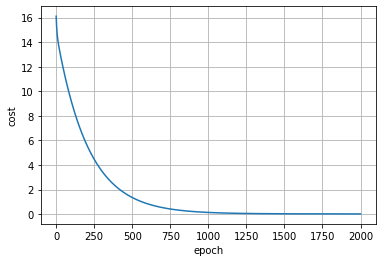

In [18]:
# 학습하는 동안 cost의 변화 보기
plt.plot(vcost)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('cost')